In [278]:
#TITANIC SURVIVAL PREDICTION

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
df1 = pd.read_csv('tested.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [281]:
df1.shape

(418, 12)

In [282]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [283]:
df1=df1.drop(['Name','PassengerId'],axis=1)

In [284]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [285]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [286]:
df1[['Age']]=df1[['Age']].fillna(np.mean(df1['Age']))
df1[['Fare']]=df1[['Fare']].fillna(np.mean(df1['Fare']))
df1[['Cabin']].value_counts()

Cabin          
B57 B59 B63 B66    3
C6                 2
B45                2
C78                2
C89                2
                  ..
C51                1
C53                1
C54                1
A18                1
G6                 1
Length: 76, dtype: int64

In [287]:
df1["Age"] = df1['Age'].astype("int")
df1["Fare"] = df1['Fare'].astype("int")

In [288]:
df1.drop_duplicates(inplace=True)
print(df1.duplicated().sum())
print(df1.shape)

0
(417, 10)


In [289]:
con_col = ['Age']
cat_col=[]
for i in df1.columns:
    if i!='Age':
        cat_col.append(i)

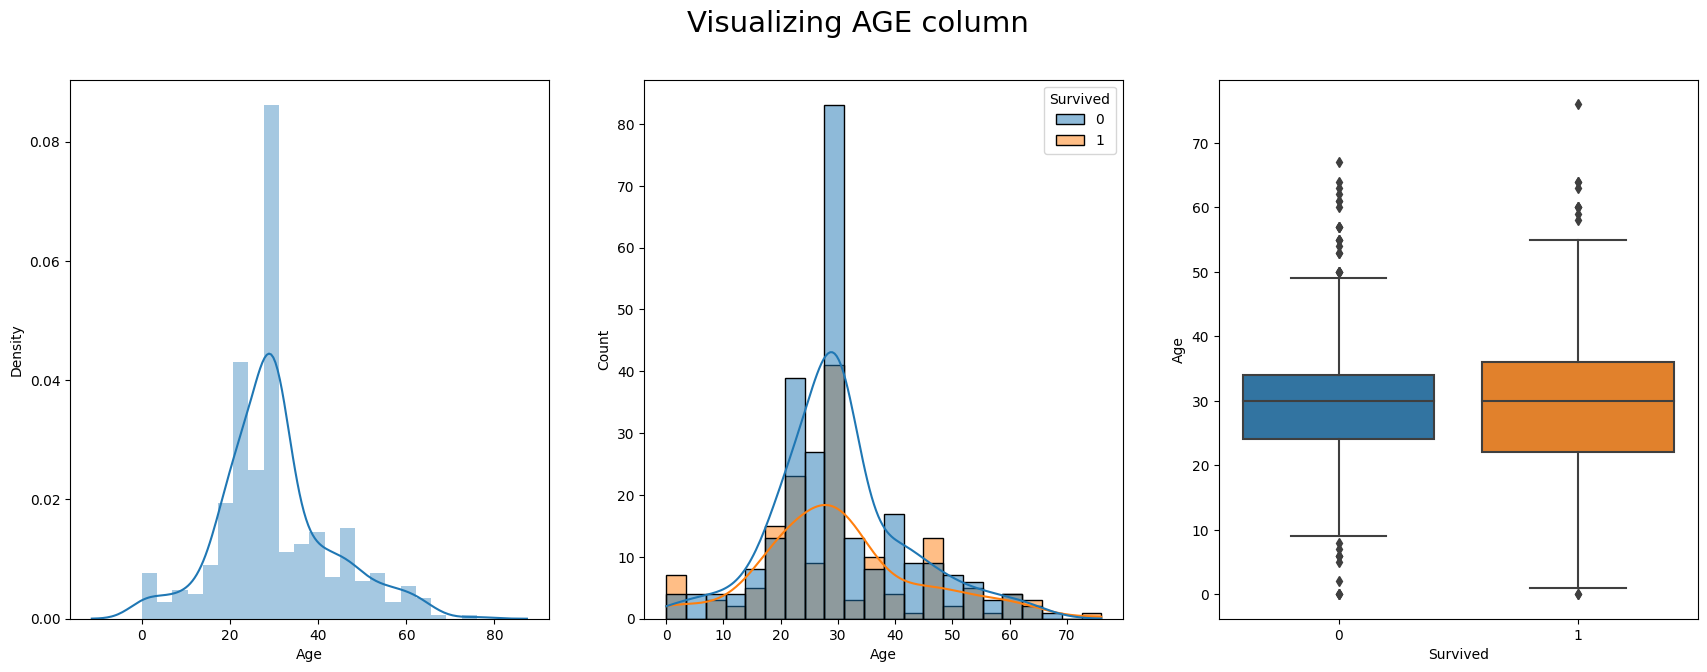

In [290]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(21,7))
sns.distplot(df1['Age'],ax=ax[0])
sns.histplot(data =df1,x='Age',ax=ax[1],hue='Survived',kde=True)
sns.boxplot(x=df1['Survived'],y=df1['Age'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=21)
plt.show()

In [291]:
lb=LabelEncoder()


df1["Cabin"] = lb.fit_transform(df1["Cabin"])
df1["Ticket"] = lb.fit_transform(df1["Ticket"])
df1["Sex"] = lb.fit_transform(df1["Sex"])
df1["Embarked"] = lb.fit_transform(df1["Embarked"])

df1[["Cabin","Sex","Embarked","Ticket"]]

,Cabin,Sex,Embarked,Ticket
0,76,1,1,152
1,76,0,2,221
2,76,1,1,73
3,76,1,2,147
4,76,0,2,138
...,...,...,...,...
413,76,1,2,267
414,22,0,0,324
415,76,1,2,346
416,76,1,2,220


In [292]:
Train = df1.drop(['Survived'], axis=1)
Test = df1.iloc[:,1]
x_train, x_test, y_train, y_test =train_test_split(Train, Test, test_size = 0.3, random_state = 7)

In [293]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9285714285714286


In [294]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 94.44%
